# Solar Linear Regression Model
### This file used scikit-learn linear regression model to fit to the solar data given



#### Installing Dependencies and importing libraries

In [2]:
# Installing Dependencies
%pip install -U scikit-learn--quiet
%pip install -U pandas--quiet

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement scikit-learn--quiet (from versions: none)
ERROR: No matching distribution found for scikit-learn--quiet


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pandas--quiet (from versions: none)
ERROR: No matching distribution found for pandas--quiet


In [3]:
# Importing matplotlib, numpy and pandas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

C:\Users\DELL\AppData\Local\Temp\ipykernel_19132\2566822119.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
# importing scikit learn models and error models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import IsolationForest

#### Importing solar csv datasets

In [5]:
# Importing csv datasets and converting to pandas dataframes
generation_data_1 = pd.read_csv("./solar_dataset/Plant_1_Generation_Data.csv")
sensor_data_1 = pd.read_csv("./solar_dataset/Plant_1_Weather_Sensor_Data.csv")

#### Fixing mismatch DATETIME

In [6]:
# Converting the date time format to match
generation_data_1['DATE_TIME'] = pd.to_datetime(generation_data_1['DATE_TIME'],format = '%d-%m-%Y %H:%M')
generation_data_1['DATE_TIME'] = generation_data_1['DATE_TIME'].dt.strftime('%Y-%m-%d %H:%M:%S')

#### Merging data frames on DATE_TIME attribute

In [7]:
# Merging two pandas data frames
merged_data = generation_data_1.merge(sensor_data_1, on = 'DATE_TIME')

merged_data
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68774 entries, 0 to 68773
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            68774 non-null  object 
 1   PLANT_ID_x           68774 non-null  int64  
 2   SOURCE_KEY_x         68774 non-null  object 
 3   DC_POWER             68774 non-null  float64
 4   AC_POWER             68774 non-null  float64
 5   DAILY_YIELD          68774 non-null  float64
 6   TOTAL_YIELD          68774 non-null  float64
 7   PLANT_ID_y           68774 non-null  int64  
 8   SOURCE_KEY_y         68774 non-null  object 
 9   AMBIENT_TEMPERATURE  68774 non-null  float64
 10  MODULE_TEMPERATURE   68774 non-null  float64
 11  IRRADIATION          68774 non-null  float64
dtypes: float64(7), int64(2), object(3)
memory usage: 6.3+ MB


#### Taking out 0 irradiance values

In [8]:
# Filtering data that have irradiation
condition = (merged_data['IRRADIATION'] > 0.0)
filtered_data = merged_data[condition]

In [9]:
# Setting specific viewing columns
selected_columns = ['DATE_TIME','DC_POWER','AC_POWER','DAILY_YIELD','TOTAL_YIELD','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION']

#filtered_data[selected_columns][100:150]

#### Building Isolation Forest Model for Anomaly Ditection

In [10]:
#Training Anomaly model
anomaly_inputs= ["AC_POWER","IRRADIATION"]
isModel= IsolationForest(contamination=0.1, random_state=42)
isModel.fit(filtered_data[anomaly_inputs])

IsolationForest(contamination=0.1, random_state=42)

In [11]:
filtered_data["anomalyScores"]=isModel.decision_function(filtered_data[anomaly_inputs])
filtered_data["anomaly"]=isModel.predict(filtered_data[anomaly_inputs])

C:\Users\DELL\AppData\Local\Temp\ipykernel_19132\594564357.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["anomalyScores"]=isModel.decision_function(filtered_data[anomaly_inputs])
C:\Users\DELL\AppData\Local\Temp\ipykernel_19132\594564357.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["anomaly"]=isModel.predict(filtered_data[anomaly_inputs])


Number of anomals values :  3838
Number of non-anomals values :  34538
Total number of values :  38376


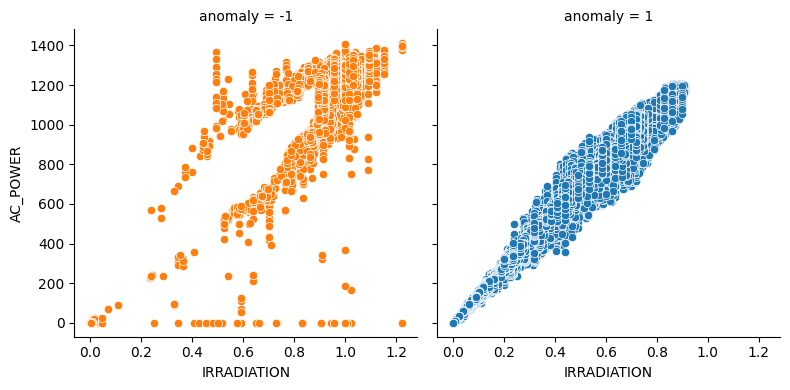

In [12]:
##ploting outliers
def outlierPlot(data,outlierMethod,x_var,y_var):
    print(f"Number of anomals values :  {len(data[data['anomaly']==-1])}")
    print(f"Number of non-anomals values :  {len(data[data['anomaly']==1])}")
    print(f"Total number of values :  {len(data)}") #printing anomal and normal values

    g=sns.FacetGrid(data,col='anomaly',height=4,hue="anomaly",hue_order=[1,-1])
    g.map(sns.scatterplot,x_var,y_var)


outlierPlot(filtered_data,"Isolation Model", "IRRADIATION", "AC_POWER")

#### Removing outliers in the data set

In [13]:
condition = (filtered_data['anomaly'] == 1)
filtered_data_no_anomaly = filtered_data[condition]

#### Finding Corelations between all the columns

In [14]:

# Selecting specific columns for correlation
selected_columns = ['DAILY_YIELD', 'TOTAL_YIELD', 'AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION']

# Calculate correlation matrix
correlation_matrix = filtered_data_no_anomaly[selected_columns].corrwith(filtered_data_no_anomaly['AC_POWER'])

# Display correlation matrix in a grid
correlation_grid = pd.DataFrame(correlation_matrix, columns=['Correlation with AC Power'])
print(correlation_grid)

                     Correlation with AC Power
DAILY_YIELD                           0.011339
TOTAL_YIELD                           0.010267
AMBIENT_TEMPERATURE                   0.523593
MODULE_TEMPERATURE                    0.912131
IRRADIATION                           0.990905


In [15]:
filtered_data_no_anomaly.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34538 entries, 489 to 68333
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            34538 non-null  object 
 1   PLANT_ID_x           34538 non-null  int64  
 2   SOURCE_KEY_x         34538 non-null  object 
 3   DC_POWER             34538 non-null  float64
 4   AC_POWER             34538 non-null  float64
 5   DAILY_YIELD          34538 non-null  float64
 6   TOTAL_YIELD          34538 non-null  float64
 7   PLANT_ID_y           34538 non-null  int64  
 8   SOURCE_KEY_y         34538 non-null  object 
 9   AMBIENT_TEMPERATURE  34538 non-null  float64
 10  MODULE_TEMPERATURE   34538 non-null  float64
 11  IRRADIATION          34538 non-null  float64
 12  anomalyScores        34538 non-null  float64
 13  anomaly              34538 non-null  int32  
dtypes: float64(8), int32(1), int64(2), object(3)
memory usage: 3.8+ MB


## Scikit Learn Model setup

#### Setting up arrays for scikit-learn

In [16]:
# X contains features, y contains the target variable
#X = filtered_data['IRRADIATION'].values.reshape(-1,1)

#y = filtered_data['AC_POWER'].values

In [17]:
# X contains features, y contains the target variable in no anonaly data set
X = filtered_data_no_anomaly['IRRADIATION'].values.reshape(-1,1)

y = filtered_data_no_anomaly['AC_POWER'].values

### Splitting data to train and test

In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [19]:
X_train
y_train

array([703.3375   , 253.4      , 699.6857143, ..., 591.9285714,
       507.4714286, 470.7125   ])

#### Training the model with the data

In [20]:
# Instantiate and terain a scikit-learn model (Linear Regresssion in the example)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

#### Predicting the power from trained model

In [21]:
# Make the predictions on the test set
y_pred = model.predict(X_test)

#### Evaluate the correctness of the model

In [22]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 2053.310963221739


#### Plotting regresssion using matplot lib

Text(0, 0.5, 'AC Power')

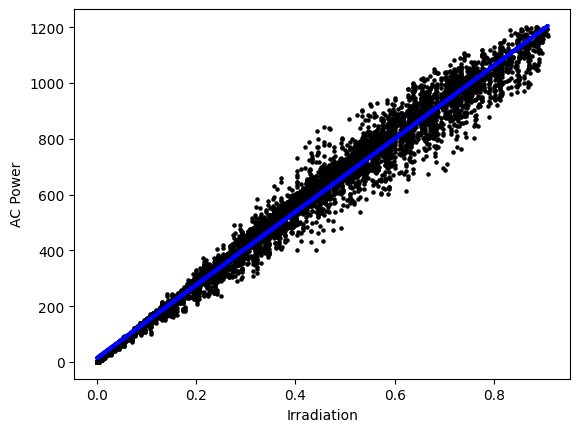

In [23]:
#Plotting regression using matplot lib
plt.scatter(X_test, y_test,s=5, color= "black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)
plt.xlabel('Irradiation')
plt.ylabel('AC Power')
